<a href="https://colab.research.google.com/github/harshaharod21/Multimodal_RAG_Colpali/blob/main/Notebook_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Simple RAG Pipeline

1) Documnent Parsing

2) Chunking strategy

3) Vector Embedding

4) Ingesting embedding to vector database and indexing

5) Retrieval Strategies

6) Evaluation of query given

## Document Parsing


We will start with applying different parsing techniquess:

- LLM parsing (Colpali)
- Docling Parsing
- Other parsing methods

Let's begin with **Docling's**



In [ ]:
# @title
pip install docling

In [ ]:
# @title
## Docling Parsing

import json
import logging
import time
from pathlib import Path

In [ ]:
# @title
from docling.backend.pypdfium2_backend import PyPdfiumDocumentBackend
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.models.ocr_mac_model import OcrMacOptions
from docling.models.tesseract_ocr_cli_model import TesseractCliOcrOptions
from docling.models.tesseract_ocr_model import TesseractOcrOptions

In [ ]:
# @title
_log = logging.getLogger(__name__)

In [ ]:
# @title
def main():
    logging.basicConfig(level=logging.INFO)

    input_doc_path = Path("/content/VF_FY2023_Environmental_Social_Responsibility_Report_FINAL_removed.pdf")

    ###########################################################################

    # The following sections contain a combination of PipelineOptions
    # and PDF Backends for various configurations.
    # Uncomment one section at the time to see the differences in the output.

    # PyPdfium without EasyOCR
    # --------------------
    # pipeline_options = PdfPipelineOptions()
    # pipeline_options.do_ocr = False
    # pipeline_options.do_table_structure = True
    # pipeline_options.table_structure_options.do_cell_matching = False

    # doc_converter = DocumentConverter(
    #     format_options={
    #         InputFormat.PDF: PdfFormatOption(
    #             pipeline_options=pipeline_options, backend=PyPdfiumDocumentBackend
    #         )
    #     }
    # )

    # PyPdfium with EasyOCR
    # -----------------
    # pipeline_options = PdfPipelineOptions()
    # pipeline_options.do_ocr = True
    # pipeline_options.do_table_structure = True
    # pipeline_options.table_structure_options.do_cell_matching = True

    # doc_converter = DocumentConverter(
    #     format_options={
    #         InputFormat.PDF: PdfFormatOption(
    #             pipeline_options=pipeline_options, backend=PyPdfiumDocumentBackend
    #         )
    #     }
    # )

    # Docling Parse without EasyOCR
    # -------------------------
    # pipeline_options = PdfPipelineOptions()
    # pipeline_options.do_ocr = False
    # pipeline_options.do_table_structure = True
    # pipeline_options.table_structure_options.do_cell_matching = True

    # doc_converter = DocumentConverter(
    #     format_options={
    #         InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    #     }
    # )

    # Docling Parse with EasyOCR
    # ----------------------

    pipeline_options = PdfPipelineOptions()
    pipeline_options.do_ocr = True
    pipeline_options.do_table_structure = True
    pipeline_options.table_structure_options.do_cell_matching = True

    doc_converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options,backend=PyPdfiumDocumentBackend)

        }
    )

    # Docling Parse with EasyOCR (CPU only)
    # ----------------------
    # pipeline_options = PdfPipelineOptions()
    # pipeline_options.do_ocr = True
    # pipeline_options.ocr_options.use_gpu = False  # <-- set this.
    # pipeline_options.do_table_structure = True
    # pipeline_options.table_structure_options.do_cell_matching = True

    # doc_converter = DocumentConverter(
    #     format_options={
    #         InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    #     }
    # )

    # Docling Parse with Tesseract
    # ----------------------
    '''
    pipeline_options = PdfPipelineOptions()
    pipeline_options.do_ocr = True
    pipeline_options.do_table_structure = True
    pipeline_options.table_structure_options.do_cell_matching = True
    pipeline_options.ocr_options = TesseractOcrOptions()


    doc_converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options,backend=PyPdfiumDocumentBackend)
       }
   )
'''
    # Docling Parse with Tesseract CLI
    # ----------------------
    # pipeline_options = PdfPipelineOptions()
    # pipeline_options.do_ocr = True
    # pipeline_options.do_table_structure = True
    # pipeline_options.table_structure_options.do_cell_matching = True
    # pipeline_options.ocr_options = TesseractCliOcrOptions()

    # doc_converter = DocumentConverter(
    #     format_options={
    #         InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    #     }
    # )

    # Docling Parse with ocrmac(Mac only)
    # ----------------------
    # pipeline_options = PdfPipelineOptions()
    # pipeline_options.do_ocr = True
    # pipeline_options.do_table_structure = True
    # pipeline_options.table_structure_options.do_cell_matching = True
    # pipeline_options.ocr_options = OcrMacOptions()

    # doc_converter = DocumentConverter(
    #     format_options={
    #         InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    #     }
    # )

    ###########################################################################

    start_time = time.time()
    conv_result = doc_converter.convert(input_doc_path)
    end_time = time.time() - start_time

    _log.info(f"Document converted in {end_time:.2f} seconds.")

    ## Export results
    output_dir = Path("scratch")
    output_dir.mkdir(parents=True, exist_ok=True)
    doc_filename = conv_result.input.file.stem

    with (output_dir / f"{doc_filename}.doctags").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_document_tokens())


    # Export Deep Search document JSON format:
'''
    with (output_dir / f"{doc_filename}.json").open("w", encoding="utf-8") as fp:
        fp.write(json.dumps(conv_result.document.export_to_dict()))
        '''
'''
    # Export Text format:
    with (output_dir / f"{doc_filename}.txt").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_text())
'''
'''

    with (output_dir / f"{doc_filename}.md").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_markdown())


    # Export Document Tags format:

    with (output_dir / f"{doc_filename}.doctags").open("w", encoding="utf-8") as fp:
        fp.write(conv_result.document.export_to_document_tokens())
'''

In [ ]:
# @title
if __name__ == "__main__":
    main()

Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

### Remarks: Docling is not able to perform OCR well.

## Colpali Retrieval


In [ ]:
from huggingface_hub import notebook_login

# Log in to Hugging Face
notebook_login()


In [ ]:
!pip install colpali-engine==0.2.2 -q
!pip install -U bitsandbytes -q
!pip install mteb transformers tqdm typer seaborn -q
!pip install pdf2image einops google-generativeai gradio -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.4/287.4 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fssp

In [ ]:
!sudo apt install poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (325 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 123630 

In [ ]:
import os
import gradio as gr
import torch
from pdf2image import convert_from_path
from PIL import Image
from torch.utils.data import DataLoader
from tqdm import tqdm
from transformers import AutoProcessor

from colpali_engine.models.paligemma_colbert_architecture import ColPali
from colpali_engine.trainer.retrieval_evaluator import CustomEvaluator
from colpali_engine.utils.colpali_processing_utils import process_images, process_queries


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [ ]:
!pip install bitsandbytes


In [ ]:
from transformers import BitsAndBytesConfig

model_name = "vidore/colpali" # specify the adapter model name

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    # bnb_4bit_compute_dtype=torch.bfloat16
)

retrieval_model = ColPali.from_pretrained("google/paligemma-3b-mix-448",
                                          torch_dtype=torch.float16, # set the dtype to bfloat16
                                          device_map="cuda",quantization_config=bnb_config).eval()    # set the device to cuda


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend


RuntimeError: CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend

In [ ]:
from transformers import ViTConfig

# Load the configuration directly from Hugging Face
vit_config = ViTConfig.from_pretrained("google/paligemma-3b-mix-448")

You are using a model of type paligemma to instantiate a model of type vit. This is not supported for all configurations of models and can yield errors.


In [ ]:


retrieval_model.load_adapter(model_name)
paligemma_processor = AutoProcessor.from_pretrained(model_name)
device = retrieval_model.device  #this one


In [ ]:
DATA_FOLDER = "pdfs-financial"
os.makedirs(DATA_FOLDER,exist_ok = True)

!wget -nc https://www.apple.com/newsroom/pdfs/fy2024-q1/FY24_Q1_Consolidated_Financial_Statements.pdf -O "data/apple-2024.pdf" -q
!wget -nc https://abc.xyz/assets/9c/12/c198d05b4f7aba1e9487ba1c8b79/goog-10-q-q1-2024.pdf -O "data/google-alphabet-2024.pdf" -q
!wget -nc https://digitalassets.tesla.com/tesla-contents/image/upload/IR/TSLA-Q4-2023-Update.pdf -O "data/tesla-2023-q4.pdf" -q
!wget -nc https://s201.q4cdn.com/141608511/files/doc_financials/2024/q1/ecefb2b2-efcb-45f3-b72b-212d90fcd873.pdf -O "data/nvidia-2024-q1.pdf" -q

data/apple-2024.pdf: No such file or directory
data/google-alphabet-2024.pdf: No such file or directory
data/tesla-2023-q4.pdf: No such file or directory
data/nvidia-2024-q1.pdf: No such file or directory


In [ ]:
from typing import List
from typing import Tuple



In [ ]:
def index(files: List[str]) -> Tuple[str, List[torch.Tensor], List[Image.Image]]:
    images = []
    document_embeddings = []

    # Convert PDF pages to images
    for file in files:
        print(f"Indexing now: {file}")
        images.extend(convert_from_path(file))


    # Create DataLoader for image batches
    dataloader = DataLoader(
        images,
        batch_size=1,
        shuffle=False,
        collate_fn=lambda x: process_images(paligemma_processor, x),
    )

    # Process each batch and obtain embeddings
    for batch in dataloader:
        with torch.no_grad():
            batch = {key: value.to(device) for key, value in batch.items()}
            embeddings = retrieval_model(**batch)
        document_embeddings.extend(list(torch.unbind(embeddings.to("cpu"))))
    total_memory = sum(embedding.element_size() * embedding.nelement() for embedding in document_embeddings)
    print(f'Total Embedding Memory (CPU): {total_memory/1024 **2} MB')


    total_image_memory = sum(image.width * image.height * 3 for image in images)  # 3 for RGB channels
    print(f'Total Image Memory: {total_image_memory / (1024 ** 2)} MB')


    # Return document embeddings, and images
    return document_embeddings, images

In [ ]:
pdf_files = [os.path.join(DATA_FOLDER, file) for file in os.listdir(DATA_FOLDER) if file.lower().endswith('.pdf')]
document_embeddings, images = index(pdf_files)

Indexing now: pdfs-financial/VF_FY2023_Environmental_Social_Responsibility_Report_FINAL_removed.pdf


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after tha

Total Embedding Memory (CPU): 1.25732421875 MB
Total Image Memory: 53.501129150390625 MB


In [ ]:
def retrieve_top_document(query: str, document_embeddings: List[torch.Tensor], document_images: List[Image.Image]) -> Tuple[str, Image.Image]:
    query_embeddings = []
    # Create a placeholder image
    placeholder_image = Image.new("RGB", (448, 448), (255, 255, 255))

    with torch.no_grad():
        # Process the query to obtain embeddings
        query_batch = process_queries(paligemma_processor, [query], placeholder_image)
        query_batch = {key: value.to(device) for key, value in query_batch.items()}
        query_embeddings_tensor = retrieval_model(**query_batch)
        query_embeddings = list(torch.unbind(query_embeddings_tensor.to("cpu")))

    # Evaluate the embeddings to find the most relevant document
    evaluator = CustomEvaluator(is_multi_vector=True)
    similarity_scores = evaluator.evaluate(query_embeddings, document_embeddings)

    # Identify the index of the highest scoring document
    best_index = int(similarity_scores.argmax(axis=1).item())

    # Return the best matching document text and image
    return document_images[best_index], best_index

In [ ]:
import google.generativeai as genai

generation_config = {
  "temperature": 0.0,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 1024,
  "response_mime_type": "text/plain",
}

genai.configure(api_key='')

model = genai.GenerativeModel(model_name="gemini-1.5-flash" , generation_config=generation_config)

def get_answer(prompt:str , image:Image):
  response = model.generate_content([prompt, image])
  return response.text



In [ ]:
def get_answer(prompt:str , image:Image):
      response = model.generate_content([prompt, image])
      return response.text

In [ ]:
def answer_query(query: str ,prompt):
    # Retrieve the most relevant document based on the query
    best_image, best_index = retrieve_top_document(query=query,
                                        document_embeddings=document_embeddings,
                                        document_images=images)

    # Generate an answer using the retrieved document

    # answer = phi_vision(prompt, best_image)

    #Gemini 1.5 Flash
    answer = f"Gemini Response\n: {get_answer(prompt, best_image)}"

    return answer, best_image, best_index


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.


tensor([1])
Top 1 Accuracy (verif): 0.0
Gemini Response
: This image is a page from an Environmental & Social Responsibility Report (Fiscal Year 2023).  It showcases the company's "purpose" – to empower sustainable and active lifestyles benefiting people and the planet.  The main focus is on "External Recognition," highlighting numerous awards and accolades received in 2022 and 2023.  These awards recognize the company's commitment to diversity, ethical practices, sustainability, and positive climate action.  Specific recognitions include listings from DiversityInc, Ethisphere, Forbes, Fortune, 3BL Media, Barron's, USA Today, and Diversity MBA, demonstrating a broad spectrum of achievements in corporate social responsibility.  The accompanying image of active individuals reinforces the company's mission of promoting healthy and sustainable lifestyles.



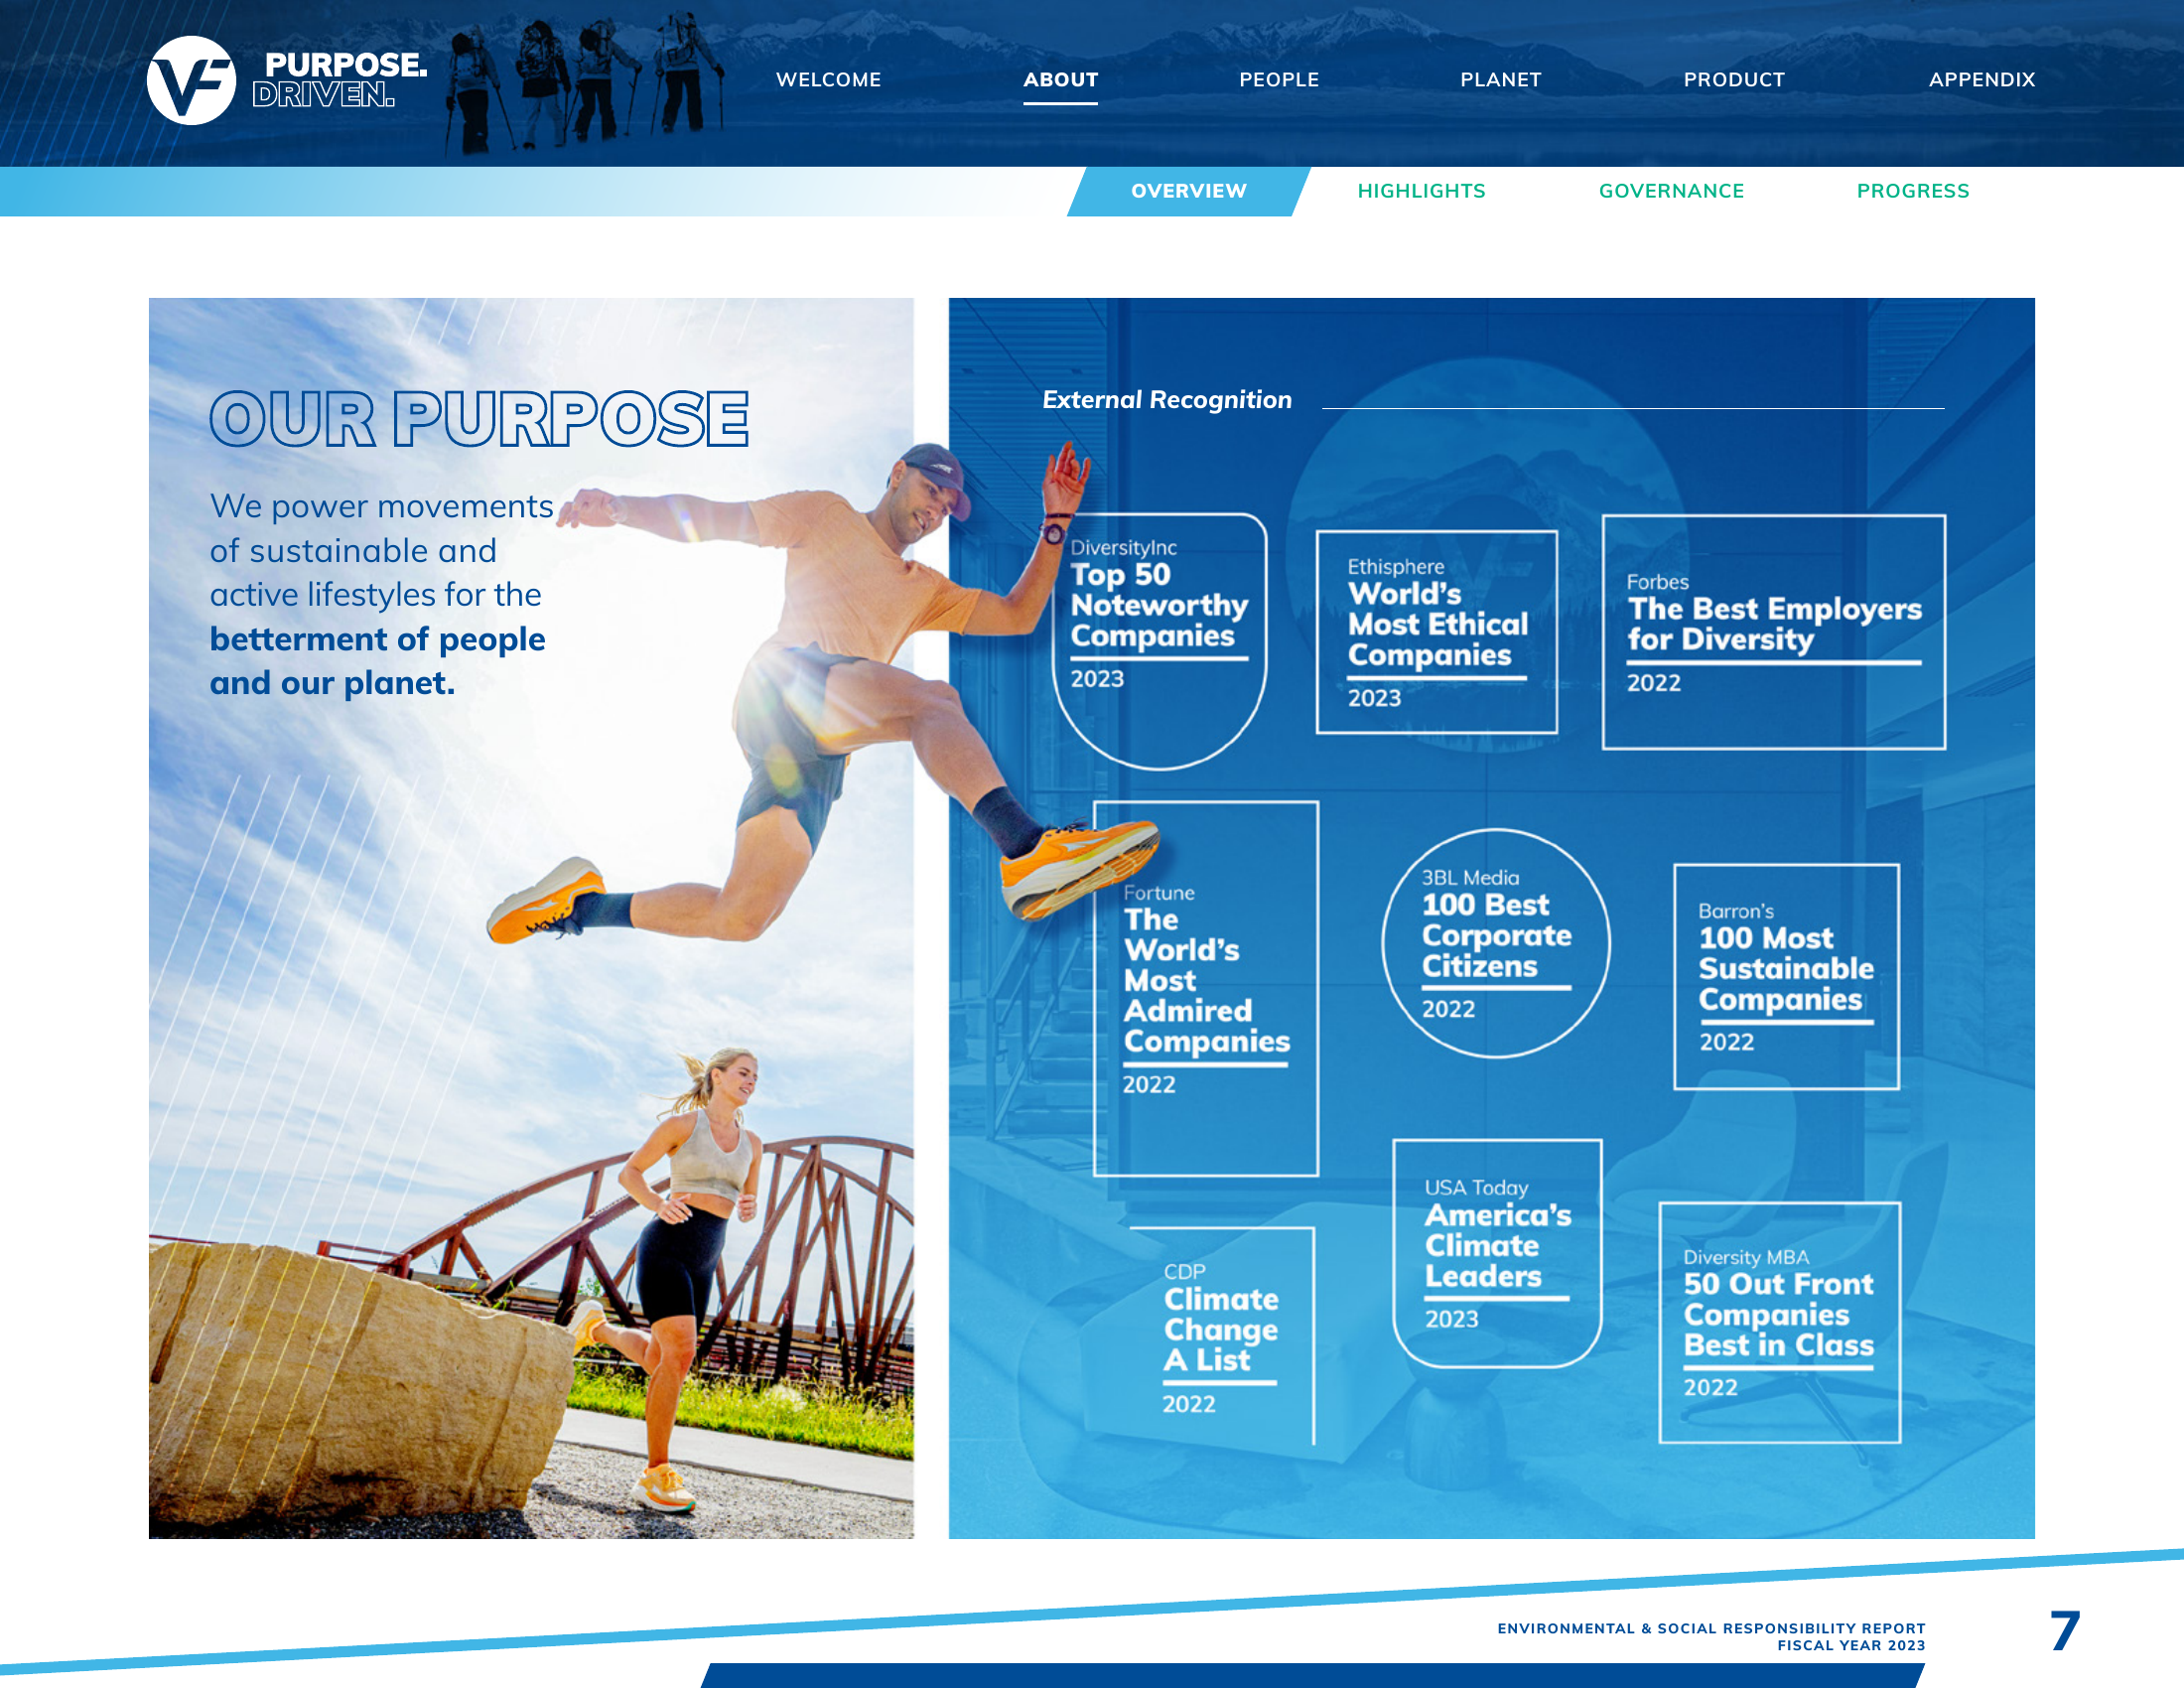

In [ ]:
search_query = "What all is described in our purpose ?"
prompt = "What is shown in this image, explain it? Format the answer in neat 200 words summary"

answer, best_image,best_index  = answer_query(search_query, prompt)
retrieved_idx = best_index

print(answer)

best_image